In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fm=tf.keras.datasets.fashion_mnist
(train_img,train_labels),(test_img,test_labels)=fm.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names=['top/t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boots']

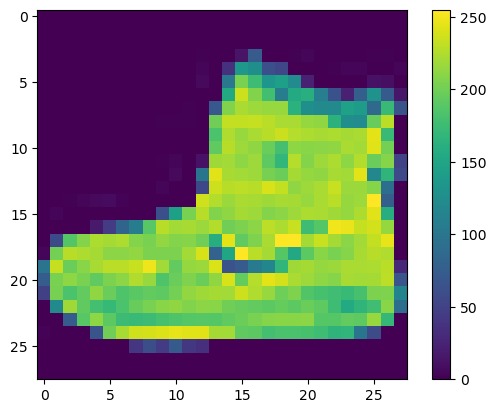

In [7]:
plt.imshow(train_img[0])
plt.colorbar()

In [8]:
train_img=train_img/255.0
test_img=test_img/255.0

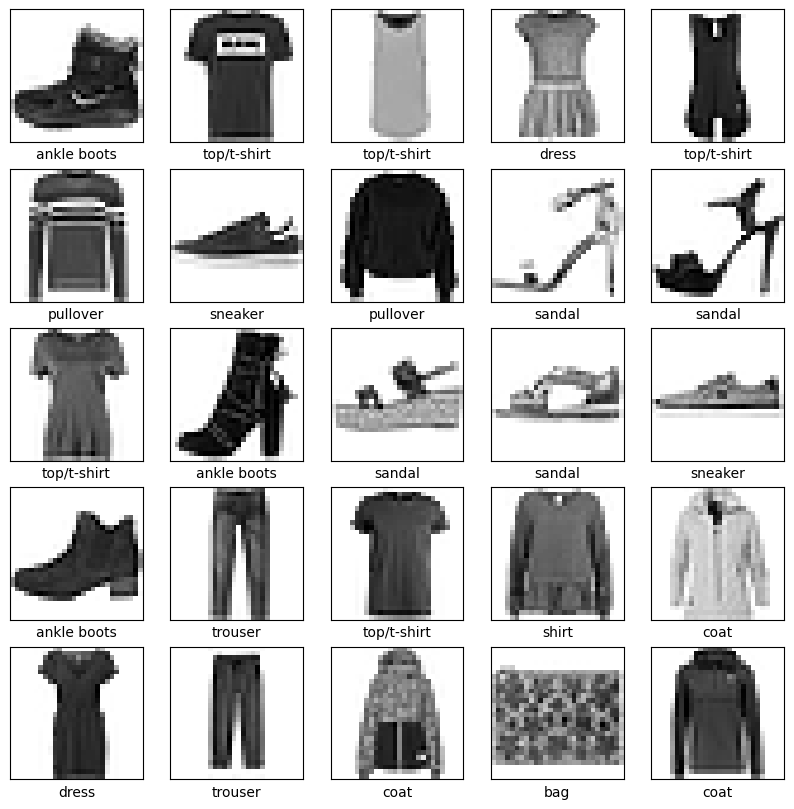

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_img[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:
model.fit(train_img,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4992 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3769 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3397 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3153 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2962 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2805 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2685 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2485 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [26]:
mse,mae=model.evaluate(test_img,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8803


In [27]:
mae

0.880299985408783

In [29]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [40]:
pr=prob_model.predict(test_img)

313/313 [==============================] - 1s 3ms/step


In [41]:
pred=pr.argmax(axis=-1)

In [42]:
pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [44]:
test_labels[0]

9

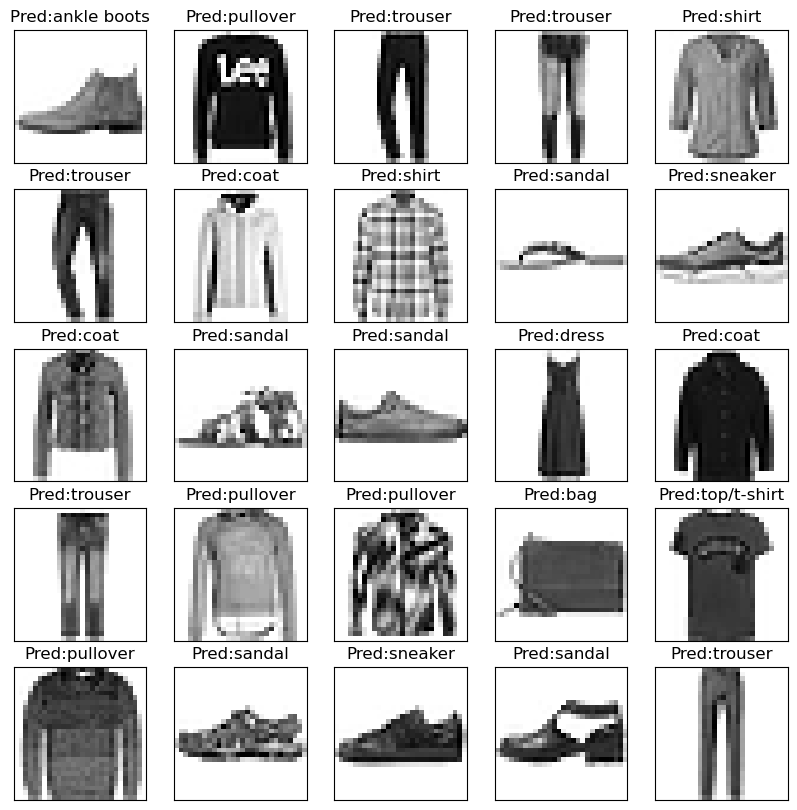

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_img[i], cmap=plt.cm.binary)
#     plt.xlabel(f"True Class:{y_test[i]}")
    plt.title(f"Pred:{class_names[pred[i]]}")
plt.show()